## Importing libraries

In [11]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [15]:
cat4 = cv2.imread('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/train/CAT/4.jpg')
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

In [16]:
dog2 = cv2.imread('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/train/Dog/2.jpg')
dog2 = cv2.cvtColor(dog2,cv2.COLOR_BGR2RGB)

In [17]:
print(dog2.shape)
print(cat4.shape)

(199, 188, 3)
(375, 500, 3)


## Image Manipulation using ImageDataGenerator

In [18]:
import keras 
from keras.preprocessing.image import ImageDataGenerator

In [19]:
image_gen = ImageDataGenerator(rotation_range=30, # rotate the image 30 degrees
                               width_shift_range=0.1, # Shift the pic width by a max of 10%
                               height_shift_range=0.1, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.2, # Shear means cutting away part of the image (max 20%)
                               zoom_range=0.2, # Zoom in by 20% max
                               horizontal_flip=True, # Allo horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )

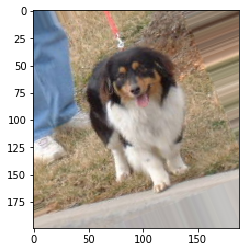

In [20]:
plt.imshow(image_gen.random_transform(dog2))

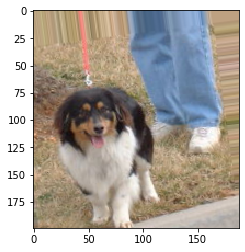

In [21]:
plt.imshow(image_gen.random_transform(dog2))

In [22]:
image_gen.flow_from_directory('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/train')

Found 18743 images belonging to 2 classes.


In [23]:
image_gen.flow_from_directory('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/test')

Found 6251 images belonging to 2 classes.


## Creating the model

In [24]:
image_shape = (150,150,3)

In [25]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [38]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 18496)            

## Training the model

In [40]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/train',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 18743 images belonging to 2 classes.


In [41]:
test_image_gen = image_gen.flow_from_directory('C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/test',
                                               target_size=image_shape[:2],
                                               batch_size=batch_size,
                                               class_mode='binary')

Found 6251 images belonging to 2 classes.


In [42]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [43]:
import warnings
warnings.filterwarnings('ignore')

In [44]:
test_image_gen[0]

(array([[[[0.81339353, 0.7706635 , 0.70440406],
          [0.8493822 , 0.81721056, 0.76931566],
          [0.8577637 , 0.83349234, 0.8074192 ],
          ...,
          [0.20623435, 0.29267654, 0.2258422 ],
          [0.20246162, 0.28010076, 0.22206946],
          [0.19868886, 0.26752496, 0.2182967 ]],
 
         [[0.7872177 , 0.7379437 , 0.6651402 ],
          [0.84194106, 0.80634797, 0.74722534],
          [0.8565191 , 0.82791585, 0.7925105 ],
          ...,
          [0.18992904, 0.2373006 , 0.20031276],
          [0.18238354, 0.21089143, 0.18144907],
          [0.17483807, 0.18448225, 0.16258535]],
 
         [[0.7876486 , 0.73304   , 0.6657866 ],
          [0.81576526, 0.77362806, 0.70796156],
          [0.84997517, 0.8180999 , 0.7712426 ],
          ...,
          [0.3027132 , 0.32177013, 0.29762164],
          [0.41086507, 0.4424978 , 0.4145766 ],
          [0.5028407 , 0.54812044, 0.5158909 ]],
 
         ...,
 
         [[0.40985578, 0.46499896, 0.4466179 ],
          [0.46015

In [45]:
results = model.fit_generator(train_image_gen,epochs=100,
                              steps_per_epoch=150,
                              validation_data=test_image_gen,
                             validation_steps=12)

Epoch 1/100
150/150 [==============================] - 124s 827ms/step - loss: 0.6949 - accuracy: 0.5221 - val_loss: 0.6884 - val_accuracy: 0.5417
Epoch 2/100
150/150 [==============================] - 125s 832ms/step - loss: 0.6901 - accuracy: 0.5417 - val_loss: 0.6008 - val_accuracy: 0.5990
Epoch 3/100
150/150 [==============================] - 119s 796ms/step - loss: 0.6851 - accuracy: 0.5671 - val_loss: 0.6959 - val_accuracy: 0.5521
Epoch 4/100
150/150 [==============================] - 119s 795ms/step - loss: 0.6787 - accuracy: 0.5625 - val_loss: 0.5728 - val_accuracy: 0.5677
Epoch 5/100
150/150 [==============================] - 117s 782ms/step - loss: 0.6824 - accuracy: 0.5504 - val_loss: 0.6658 - val_accuracy: 0.6146
Epoch 6/100
150/150 [==============================] - 144s 962ms/step - loss: 0.6802 - accuracy: 0.5750 - val_loss: 0.7004 - val_accuracy: 0.4844
Epoch 7/100
150/150 [==============================] - 154s 1s/step - loss: 0.6705 - accuracy: 0.5888 - val_loss: 0.63

Epoch 57/100
150/150 [==============================] - 85s 567ms/step - loss: 0.4986 - accuracy: 0.7496 - val_loss: 1.0287 - val_accuracy: 0.7604
Epoch 58/100
150/150 [==============================] - 85s 569ms/step - loss: 0.4971 - accuracy: 0.7642 - val_loss: 0.4740 - val_accuracy: 0.7292
Epoch 59/100
150/150 [==============================] - 84s 559ms/step - loss: 0.4839 - accuracy: 0.7683 - val_loss: 0.4192 - val_accuracy: 0.8125
Epoch 60/100
150/150 [==============================] - 82s 547ms/step - loss: 0.4675 - accuracy: 0.7812 - val_loss: 0.4454 - val_accuracy: 0.7812
Epoch 61/100
150/150 [==============================] - 60s 400ms/step - loss: 0.4818 - accuracy: 0.7833 - val_loss: 0.5410 - val_accuracy: 0.7552
Epoch 62/100
150/150 [==============================] - 61s 408ms/step - loss: 0.4895 - accuracy: 0.7588 - val_loss: 0.4133 - val_accuracy: 0.7969
Epoch 63/100
150/150 [==============================] - 63s 421ms/step - loss: 0.4620 - accuracy: 0.7808 - val_loss: 0

In [46]:
model.save('cat_dog11.h5')

## Evaluating the model

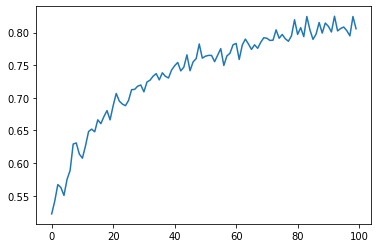

In [48]:
plt.plot(results.history['accuracy'])

In [49]:
model.save('cat_dog_100epoch.h5')

In [50]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

## Predicting on new images

In [51]:
import numpy as np
from keras.preprocessing import image

dog_file = 'C:/Users/acer/kaggle_projects/dogs-vs-cats/CATS_DOGS/train/Dog/2.jpg'

dog_img = image.load_img(dog_file, target_size=(150, 150))

dog_img = image.img_to_array(dog_img)

dog_img = np.expand_dims(dog_img, axis=0)
dog_img = dog_img/255

In [52]:
prediction_prob = model.predict(dog_img)

In [53]:
print(f'Probability that image is a dog is: {prediction_prob} ')

Probability that image is a dog is: [[0.9680567]] 
